In [138]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



In [139]:
#Code
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

data1 = pd.read_csv(mouse_drug_data_to_load)
data2 = pd.read_csv(clinical_trial_data_to_load)
#Combine by Mouse ID
same_variable=[c for c in data1.columns if c in data2.columns][0]


merged=data1.join(data2.set_index(same_variable), on=same_variable).reset_index()
merged=merged.drop('index',axis=1)
merged

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment
1. I have to get the Mean of Tumor volume per Medicine
2. I have to groupby the variables Drug and Timepoint

In [140]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
df1=merged.groupby(['Drug', 'Timepoint']).mean()
mean_df=df1.drop("Metastatic Sites", axis=1).reset_index()

In [141]:
df1=merged.groupby(['Drug', 'Timepoint']).mean()
mean_df=df1.drop("Metastatic Sites", axis=1).reset_index()
mean_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [142]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

combined_sem = merged.groupby(['Drug','Timepoint']).sem()
combined_sem= combined_sem.drop('Metastatic Sites', axis=1).reset_index()
combined_sem= combined_sem.drop('Mouse ID', axis=1).reset_index()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)
# Preview DataFrame
tumor_sem_df.head()

# Convert to DataFrame

# Preview DataFrame



,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,0.000000
1,1,Capomulin,5,0.448593
2,2,Capomulin,10,0.702684
3,3,Capomulin,15,0.838617
4,4,Capomulin,20,0.909731


In [143]:
std_err_tv_df = df1.sem()["Tumor Volume (mm3)"]
std_err_tv_df

0.8980673775157741

In [144]:
# Minor Data Munging to Re-Format the Data Frames


# Preview that Reformatting worked


In [145]:
pivot_df = mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_df.reset_index(level = None, inplace = True)
pivot_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [146]:
four_drugs_table = pivot_df[['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
four_drugs_table.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


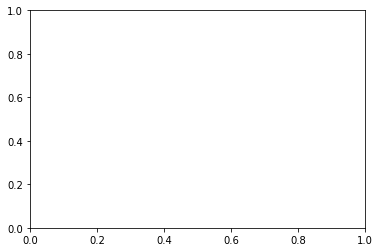

In [147]:
fig, ax = plt.subplots()
x_axis = pivot_df.index.values


In [148]:
y_axis = pivot_df.Capomulin.values
# tv is tumor volume
std_err_tv_df = df1.sem()["Tumor Volume (mm3)"]


AttributeError: 'numpy.float64' object has no attribute 'Drug'

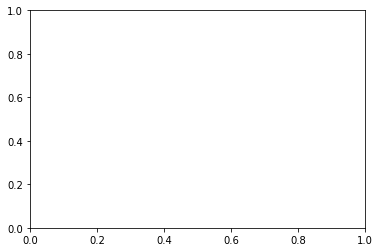

In [149]:
fig, ax = plt.subplots()
x_axis = pivot_df.index.values

y_axis = pivot_df.Capomulin.values
# tv is tumor volume
std_err_tv_df = df1.sem()["Tumor Volume (mm3)"]
standard_errors = std_err_tv_df[std_err_tv_df.Drug == 'Capomulin']['Tumor Volume (mm3)'].values
ax.errorbar(x_axis, y_axis, standard_errors, fmt="o", label='Capomulin', color='red', linestyle='solid')

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='topleft')




In [ ]:
#To set the index to the column value Timepoint
#Multiply by 100 or see what do I have to compute to get that value 
#How to make column names to be the values of a list (lets say your list is df['Drug'].unique())
(Timepoint[20]-Timepoint[0]) 

In [ ]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(15,15))

error = df1["Tumor Volume (mm3)"]["Capomulin"]
capumulin_response = plt.errorbar(x_axis, pivot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red")

error = df1["Tumor Volume (mm3)"]["Infubinol"]
infubinol_response = plt.errorbar(x_axis, pivot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue")

error = df1["Tumor Volume (mm3)"]["Ketapril"]
ketapril_response = plt.errorbar(x_axis, pivot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "green")

error = df1["Tumor Volume (mm3)"]["Placebo"]
placebo_response = plt.errorbar(x_axis, pivot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color = "black")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((capumulin_response, infubinol_response, ketapril_response, placebo_response), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.savefig("plot.png")
plt.show()

In [ ]:
# Generate the Plot (with Error Bars)


# Save the Figure
plt.savefig("plot.png")


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df1=merged.groupby(['Drug', 'Timepoint']).mean()
mean_df_two=df1.drop("Tumor Volume (mm3)", axis=1).reset_index()
mean_df_two.head()
# Convert to DataFrame


# Preview DataFrame


In [ ]:
combined_sem = merged.groupby(['Drug','Timepoint']).sem()
combined_sem= combined_sem.drop('Tumor Volume (mm3)', axis=1).reset_index()
combined_sem= combined_sem.drop('Mouse ID', axis=1).reset_index()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)
# Preview DataFrame
tumor_sem_df.head()

In [ ]:
combined_sem = merged.groupby(['Drug','Timepoint']).sem()
combined_sem= combined_sem.drop('Tumor Volume (mm3)', axis=1).reset_index()
combined_sem= combined_sem.drop('Mouse ID', axis=1).reset_index()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(combined_sem)
# Preview DataFrame
tumor_sem_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
pivot_df = mean_df_two.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
pivot_df.reset_index(level = None, inplace = True)
pivot_df

In [ ]:
met_table_fourdrugs = pivot_df[['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
met_table_fourdrugs.head()

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
plt.figure(figsize = (20, 15))
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], yerr=None, linestyle="--", fmt='o')
plt.ylabel('Met Sites')
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend(("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.savefig('plot2.png')
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

micecount = merged.groupby(["Drug","Timepoint"]).count()
# Convert to DataFrame
mice_df = pd.DataFrame(micecount["Mouse ID"])
mice_df.reset_index(inplace=True)

mice_df.head()


# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames
survival_df = mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
survival_df.head()




In [ ]:
# Generate the Plot (Accounting for percentages)

x_axis = survival_df.index.values

mice_count = survival_df.Capomulin.values[0]
y_axis = survival_df.Capomulin.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='o', label='Capomulin', color='red')

y_axis = survival_df.Infubinol.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='^', label='Infubinol', color='blue')

mice_count = survival_df.Ketapril.values[0]
y_axis = survival_df.Ketapril.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='s', label='Ketapril', color='green')

mice_count = survival_df.Placebo.values[0]
y_axis = survival_df.Placebo.values / mice_count * 100
plt.plot(x_axis, y_axis, marker='d', label='Placebo', color='black')


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='bottomleft')
plt.grid()
# Save the Figure
plt.savefig("plots3.png")
# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [160]:
# Calculate the percent changes for each drug

avg_tumor_df = mean_df_two.drop(['Timepoint'], axis=1)
druggrouped_df = avg_tumor_df.groupby(['Drug'])

percentChanges = (drug_grouped_df["Tumor Volume (mm3)"].last() - drug_grouped_df["Tumor Volume (mm3)"].first()) / drug_grouped_df["Tumor Volume (mm3)"].first() * 100
percentChanges


KeyError: 'Column not found: Tumor Volume (mm3)'

In [158]:
percentChanges = percentChanges.sort_values(ascending=True)

# Splice the data between passing and failing drugs
failingDrug_s = percentChanges[percentChanges < 0].sort_values(ascending=True)
passingDrug_s = percentChanges[percentChanges >= 0].sort_values(ascending=True)

# Use functions to label the percentages of changes
plt.figure(figsize=(14,4))
# Call functions to implement the function calls
neg_ax = plt.bar(failingDrug_s.index.values, failingDrug_s.values, color='g', width=1)
pos_ax = plt.bar(passingDrug_s.index.values, passingDrug_s.values, color='r', width=1)

# Add labels
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.7,len(percentChanges)-0.3)
plt.ylim(-30,70)
plt.grid()

# For each bar: Place a label % for negative
neg_rects = neg_ax.patches
for rect in neg_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, -5, percentY, color='w')

# For each bar: Place a label % for positive
pos_rects = pos_ax.patches
for rect in pos_rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    percentY = str(int(y_value)) + '%'
    plt.text(x_value-0.1, 5, percentY, color='w')

# Save the Figure
plt.savefig("Tumor_Change_Over_45_Days_Treatment.png")

# Show the Figure
fig.show()

NameError: name 'percentChanges' is not defined

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)